naive bayes test

In [1]:
import sys
sys.path.append('../../')

In [2]:
import pandas as pd
import numpy as np
import prince
import matplotlib.pyplot as plt

from modules import machine_learning_utils as mlu

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

# 1.0 Data retrieval

In [3]:
df = pd.read_pickle("../../data_lake/output/train_eng.pkl")
val = pd.read_pickle("../../data_lake/output/val_eng.pkl")

In [4]:
df = df.drop(columns=['card1', 'card2', 'card3','card5', 'addr1', 'addr2','id_21', 'id_22', 'id_23', 'id_24', 'id_25',
       'id_26', 'id_27', 'id_28', 'id_29','id_35', 'id_36', 'id_37', 'id_38','id_34','M4'])

In [5]:
val = val.drop(columns=['card1', 'card2', 'card3','card5', 'addr1', 'addr2','id_21', 'id_22', 'id_23', 'id_24', 'id_25',
       'id_26', 'id_27', 'id_28', 'id_29','id_35', 'id_36', 'id_37', 'id_38','id_34','M4'])

Test naive bayes mixed

In [89]:
from mixed_naive_bayes import MixedNB
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import *

imp_mean = IterativeImputer(random_state=0)
imp_mean2 = SimpleImputer(strategy='constant', fill_value='missing',verbose=0,add_indicator=True)
enc = OrdinalEncoder()
scaler = StandardScaler()

In [90]:
X_train = df.drop(columns='isFraud')
y_train = df['isFraud'].astype(float)

In [91]:
X_train['id_32'] = X_train['id_32'].astype(str)

In [92]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

In [93]:
for i in X_train:
    if i in numerical_cols:
        print(i)
        X_train[i] = imp_mean.fit_transform(X = X_train[i].values.reshape(-1,1))
        X_train[i] = np.log(X_train[i] +1)
        X_train[i] = scaler.fit_transform(X = X_train[i].values.reshape(-1,1))

TransactionAmt
max_c
max_d
num_transaction_per_time
multi_transaction_per_time


In [94]:
for i in X_train:
    if i in categorical_cols:
        print(i)
        X_train[i] = imp_mean2.fit_transform(X = X_train[i].values.reshape(-1,1))
        X_train[i] = enc.fit_transform(X = X_train[i].values.reshape(-1,1))
        print("fine: ",i)

ProductCD
fine:  ProductCD
card4
fine:  card4
card6
fine:  card6
P_emaildomain
fine:  P_emaildomain
R_emaildomain
fine:  R_emaildomain
id_30
fine:  id_30
id_32
fine:  id_32
id_33
fine:  id_33
DeviceType
fine:  DeviceType
browser_enc
fine:  browser_enc
device_info_v4
fine:  device_info_v4


In [95]:
# class ModifiedLabelEncoder(LabelEncoder):

#     def fit_transform(self, X_train, *args, **kwargs):
#         return super().fit_transform(X_train).reshape(-1, 1)

#     def transform(self, X_train, *args, **kwargs):
#         return super().transform(X_train).reshape(-1, 1)

In [96]:
# def log_transform(x):
#     print(x)
#     return np.log(x + 1)

In [97]:
# scaler = StandardScaler()
# transformer = FunctionTransformer(log_transform)

In [98]:
# numerical_preprocessor = Pipeline(steps=[("imputer", IterativeImputer(ExtraTreesRegressor(n_estimators=5,random_state=1,verbose=0),random_state=1,verbose=0,add_indicator=True)),
#                                          ('transformer', transformer),
#                                  ("scaler", StandardScaler())])
# categorical_preprocessor = Pipeline(steps=[("imputer", SimpleImputer(strategy='constant', fill_value='missing',verbose=0,add_indicator=True)),
#                                        ("label_enc", OrdinalEncoder())])
# preprocessor = ColumnTransformer(transformers=[("numerical_preprocessor", numerical_preprocessor, numerical_cols),
#                                            ("categorical_preprocessor", categorical_preprocessor, categorical_cols)])

In [99]:
# pipe_model = MixedNB(categorical_features=[X_train.columns.get_loc(c) for c in categorical_cols if c in X_train])

In [100]:
pipe_model = MixedNB(categorical_features=[X_train.columns.get_loc(c) for c in categorical_cols if c in X_train])

In [101]:
# model = Pipeline(steps=[('preprocessor', preprocessor),
#                         ('model', pipe_model)])

In [109]:
X_train = X_train.astype(float)
y_train = y_train.astype(int)

In [110]:
X_train.sample(3)

,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,id_30,id_32,id_33,DeviceType,max_c,max_d,num_transaction_per_time,multi_transaction_per_time,browser_enc,device_info_v4
60391,-0.632215,0.0,4.0,0.0,18.0,17.0,70.0,4.0,109.0,2.0,-0.089338,1.322409,-0.130863,-0.131772,1.0,16.0
80217,-1.108769,0.0,4.0,0.0,1.0,1.0,70.0,4.0,109.0,2.0,-0.709902,-1.108178,-0.130863,-0.131772,1.0,5.0
122937,-1.543039,0.0,4.0,1.0,1.0,1.0,70.0,4.0,109.0,2.0,-0.709902,0.891145,-0.130863,-0.131772,0.0,16.0


In [111]:
y_train.sample(3)

138462    0
144114    1
102851    1
Name: isFraud, dtype: int64

In [112]:
X_train.dtypes

TransactionAmt                float64
ProductCD                     float64
card4                         float64
card6                         float64
P_emaildomain                 float64
R_emaildomain                 float64
id_30                         float64
id_32                         float64
id_33                         float64
DeviceType                    float64
max_c                         float64
max_d                         float64
num_transaction_per_time      float64
multi_transaction_per_time    float64
browser_enc                   float64
device_info_v4                float64
dtype: object

In [113]:
y_train.dtypes

dtype('int64')

In [114]:
model_grid = pipe_model.fit(X_train,y_train)

Test results...
Model Test Recall: 0.7484739005855239
--------------------------------------------------
Model Test Confusion Matrix
Classification report : 
               precision    recall  f1-score   support

           0       0.71      0.60      0.65      8027
           1       0.65      0.75      0.70      8027

    accuracy                           0.68     16054
   macro avg       0.68      0.68      0.67     16054
weighted avg       0.68      0.68      0.67     16054



AttributeError: 'MixedNB' object has no attribute 'named_steps'

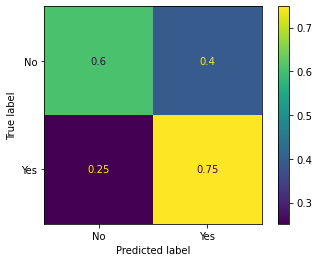

In [116]:
mlu.model_evaluation(model_grid, X_train, y_train)

# 2.0 Training baseline

In [6]:
for i in df:
    if df[i].dtypes == 'object':
        df[i] = df[i].astype(str)

In [7]:
X_train = df.drop(columns='isFraud')
y_train = df['isFraud'].astype(float)

In [8]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

In [9]:
parameters = {'model__max_depth':[2,4],'model__n_estimators':[100,200,400],'model__learning_rate':[0.05,0.5,0.1]}

In [10]:
model = mlu.model_training(X_train,y_train,numerical_cols,categorical_cols,parameters)

GridSearchCV results...
Mean Train Scores: 
[0.74785116 0.76932023 0.78368824 0.80175212 0.81757385 0.8322327
 0.80885338 0.8315685  0.84315414 0.87243039 0.89219657 0.89219657
 0.76915414 0.7855569  0.79643699 0.81915191 0.83468299 0.85565353]

Mean CV Scores: 
[0.74473521 0.764668   0.77550669 0.78746744 0.80004934 0.80702598
 0.78846315 0.80253957 0.81013983 0.82459206 0.83605325 0.83605325
 0.76479257 0.77600513 0.78410297 0.80042266 0.80752374 0.82060483]

Best Parameters: 
{'model__learning_rate': 0.5, 'model__max_depth': 4, 'model__n_estimators': 200}



# 3.0 Evaluation baseline

In [11]:
for i in val:
    if val[i].dtypes == 'object':
        val[i] = val[i].astype(str)

In [12]:
X_val = val.drop(columns='isFraud')
y_val = val['isFraud'].astype(float)

In [13]:
m = mlu.model_calibration(model,X_val,y_val)

Test results...
Model Test Recall: 0.8300180831826401
--------------------------------------------------
Model Test Confusion Matrix
Classification report : 
               precision    recall  f1-score   support

         0.0       0.98      0.84      0.91     19976
         1.0       0.30      0.83      0.44      1659

    accuracy                           0.84     21635
   macro avg       0.64      0.83      0.67     21635
weighted avg       0.93      0.84      0.87     21635

ProductCD: 0.39795216196134353
TransactionAmt: 0.10475515203312302
card4: 0.0966983772789171
id_30: 0.036983576270536354
id_32: 0.027146168743186216
device_info_v4: 0.026108062606987125
DeviceType: 0.0067923289384012285
id_33: 0.005297993187425341
max_d: 0.0018355590591574054
num_transaction_per_time: 0.0015626353732598973
max_c: 0.001525769829673219
P_emaildomain: 0.0010695735639445186
browser_enc: 0.0007868522868852358
card6: 0.0005479967741976651
R_emaildomain: 0.00011436944483328174
multi_transaction_per_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(add_indicator=True,
                                                                                    estimator=ExtraTreesRegressor(n_estimators=5,
                                                                                                                  random_state=1),
                                                                                    random_state=1)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['TransactionAmt', 'max_c', 'max_d', 'num_transaction_per_time',
       'multi_transaction_per_t...
                           

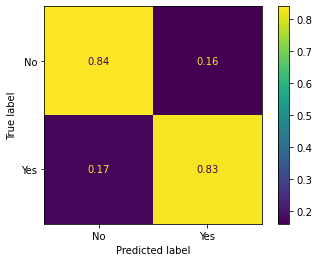

In [14]:
mlu.model_evaluation(m.base_estimator, X_val, y_val)